<a href="https://www.kaggle.com/code/sureshvj/text-classification-based-on-ecomers-product-ipynb?scriptVersionId=203650010" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Data Link: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sbn
import pandas as pd 
import numpy as np 
import spacy
import os
import re



for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


## 1. Data Loading: 

In [2]:
data = pd.read_csv("/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv",
                   names=['target', 'text'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  50425 non-null  object
 1   text    50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


## 2. Data Explore: 

In [3]:
display(data.head())
print(f"Data size: {data.shape}")

,target,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


Data size: (50425, 2)


In [4]:
data['target'].value_counts()

target
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [5]:
data.isna().sum()

target    0
text      1
dtype: int64

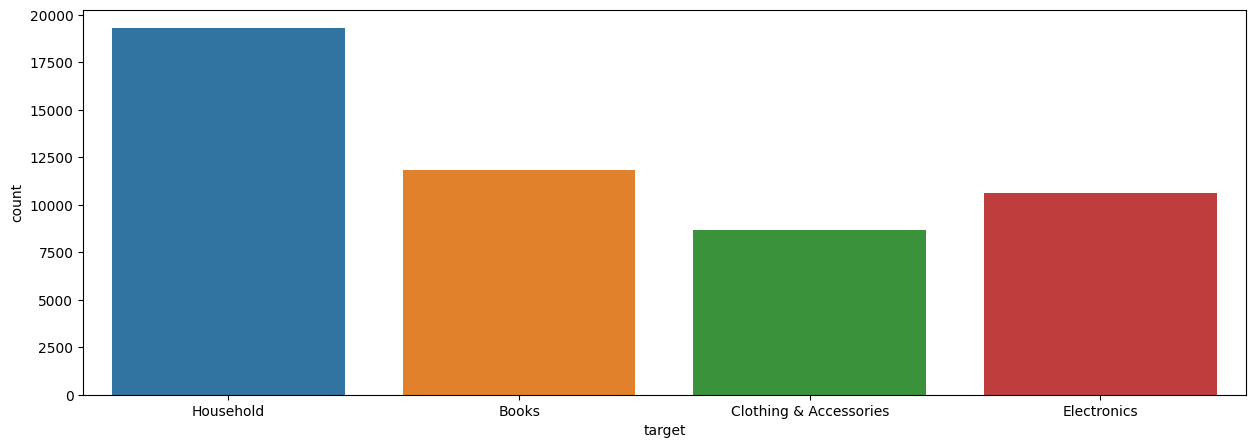

In [6]:
plt.figure(figsize=(15,5))
sbn.countplot(data, x = 'target')
plt.xticks()
plt.show()

In [7]:
print(data['target'][50421])
data['text'][50421]
input_text = data['text'][0]

Electronics


## 3. Data Cleaning
1. Remove null values.
2. Remove extra spaces.
3. Remove special characters.
4. Converting to lowercase.


In [8]:
data = data.dropna(subset=['text'],axis=0)
data.isna().sum()

target    0
text      0
dtype: int64

In [9]:
def data_cleaning(text):
    
    # Step 1: Remove non-alphanumeric characters
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Step 2: Remove extra spaces
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()
    
    return cleaned_text.lower()

data.loc[:,'text'] = data['text'].apply(data_cleaning)

display(data.head())
data['text'][5]

,target,text
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


'pitaara box romantic venice canvas painting 6mm thick mdf frame 211 x 14inch enclosure materialmdf mount frame size211inch x 14inch 536cms x 356cms size 211 inch x 140 inch 536 cms x 356 cms enhance the beauty of your room walls with this breathtaking digital printed artwork our highend printing technology captures every detail of the image in our prints on enhanced matte painting canvas ensuring rich and lively colours this wall art panel is mounted on mdf and ready to hang on walls beautiful interior home dcor artwork gifts for living dining room outdoor gallery hotels restaurants office reception kitchen area balcony and bathroom pitaara box offers an exclusive collection of thousands of artworks digital paintings canvas prints wall posters and other wall decor products for your home office and surroundings we provide a neverending range of creative and spectacular art products which can be used for gifting on every occasion and every season tags wall paintings canvas prints modern

In [10]:
def encode_target(column):
    
    # Creating LabelEncoder object
    le = LabelEncoder()
    # Encoding the column
    data[column] = le.fit_transform(data[column])
    
    # Creating a dictionary with original values and their encoded values
    encoded_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Encoded Dictionary:", encoded_dict)
    
# Calling encode_target function to encode the 'target' column.
encode_target('target')
data.head()

Encoded Dictionary: {'Books': 0, 'Clothing & Accessories': 1, 'Electronics': 2, 'Household': 3}


,target,text
0,3,paper plane design framed wall hanging motivat...
1,3,saf floral framed painting wood 30 inch x 10 i...
2,3,saf uv textured modern art print framed painti...
3,3,saf flower print framed painting synthetic 135...
4,3,incredible gifts india wooden happy birthday u...


In [11]:
# Defining the TF-IDF algorithm.
tfidf = TfidfVectorizer(stop_words='english')

# Performing vectorizaton
text_vectors = tfidf.fit_transform(data['text'])

In [12]:
# Spliting data
x_train, x_test, y_train, y_test = train_test_split(text_vectors,data['target'], test_size=0.3, random_state=42)


# 4. Train Model


## OneVsRestClassifier (OvR)
The ***OneVsRestClassifier (OvR)*** is a strategy in machine learning used for **multiclass classification problems**. In multiclass classification, where a model has to predict one class out of multiple possible classes, some algorithms like support vector machines (SVM) or logistic regression are natively binary classifiers. OneVsRestClassifier helps in extending these binary classifiers to handle multiclass problems.

### Here’s how it works:
> One-vs-Rest (OvR) trains one classifier per class, such that for each classifier, that class is treated as the positive class (class 1), and all the other classes are treated as the negative class (class 0). 
> During prediction, the classifier with the highest confidence score is selected as the predicted class.

### Use Cases:
> It is often used with binary classifiers like Logistic Regression, Support Vector Machines (SVM), Naive Bayes, etc., for multiclass classification problems.

### Example:
> If you have a dataset with three classes (A, B, C), OneVsRest would train:

>> 1. A classifier to distinguish class A from not-A (B and C),
>> 2. A classifier to distinguish class B from not-B (A and C),
>> 3. A classifier to distinguish class C from not-C (A and B).
>> 4. Each classifier is trained independently, and at **prediction time**, the classifier with the highest score is chosen as the final prediction.

### Advantages:
> 1. It is simple and works well with many binary classifiers.
> 2. Can be more efficient than training a truly multiclass model in some cases.
### Disadvantages:
> 1. Overlapping classifiers can lead to ambiguity in predictions.
> 2. Requires training multiple classifiers, which can increase computational complexity for a large number of classes.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

ovr_knn = OneVsRestClassifier(KNeighborsClassifier())
ovr_knn.fit(x_train, y_train)
y_pred = ovr_knn.predict(x_test)

print(accuracy_score(y_pred, y_test))

0.9588841882601798


In [14]:
import pickle

pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(ovr_knn, open('ovr_knn.pkl', 'wb'))

In [15]:
input_text

clf = pickle.load(open('ovr_knn.pkl','rb'))
cleaned_input_text = data_cleaning(input_text)
vectorized_input_text = tfidf.transform([cleaned_input_text])
output = ovr_knn.predict(vectorized_input_text)[0]

print(output)

3
